In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, model_selection
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [ ]:
data = pd.read_csv("data/train.csv")

In [ ]:
data = data.drop(["Condition1", "Condition2",
                 "MiscVal", "MiscFeature", "GarageYrBlt",
                 "GarageCars", "GarageFinish", "GarageType",
                 "Fireplaces", "FireplaceQu", "PavedDrive", "MasVnrArea",
                  "MasVnrType", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
                  "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch",
                  "ScreenPorch", "BsmtFinType1", "BsmtFinType2",
                  "BsmtFinSF1", "BsmtFinSF2", "Id", "PoolQC", "Fence", "Alley", "PoolArea",
                  "Exterior1st", "Exterior2nd", "BsmtExposure", "MoSold", "YrSold", "YearBuilt"
                  ], axis=1)


In [ ]:
data['bathrooms'] = data[["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath"]].sum(axis=1)
data = data.drop(["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath"], axis=1)


In [ ]:
plt.figure(figsize=(9, 8))
sns.distplot(data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
df_num = data.select_dtypes(include = ['float64', 'int64']).drop(["MSSubClass"], axis=1)
df_num
# df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose information

In [ ]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))


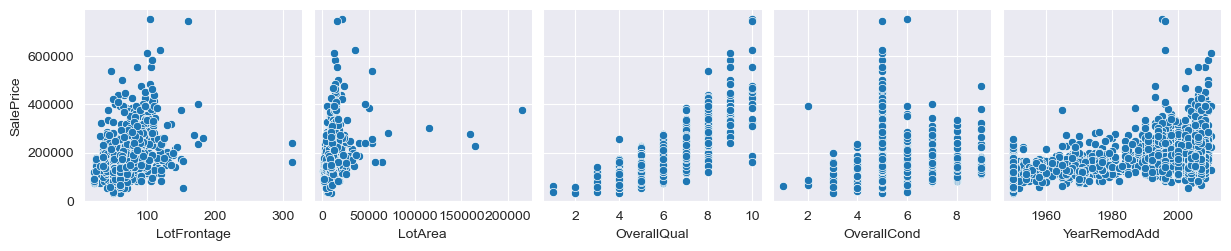

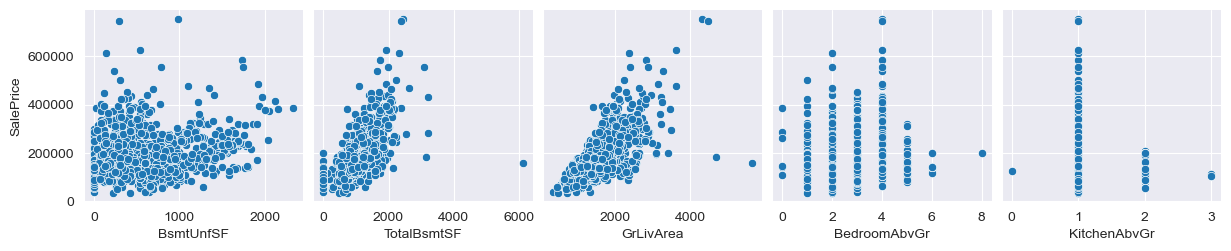

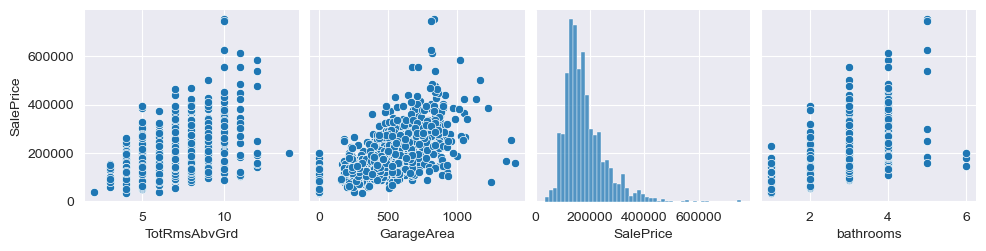

In [42]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

In [41]:
"""
Remove outliers
Deal with categorical data
"""
df_cat = data.select_dtypes(include = ['object'])
df_cat['MSSubClass'] = data['MSSubClass']

categorical_col = df_cat.columns
for col in categorical_col:
    data[col] = data[col].astype("categorical")


TypeError: data type 'categorical' not understood

In [47]:
data = data[data["LotFrontage"] < 200]

data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,SalePrice,bathrooms
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,57.226856,69.644704,9891.954128,6.118432,5.561301,1985.152627,589.806505,1055.567973,1507.221852,2.862385,1.051710,6.528774,471.628857,180736.736447,2.398666
std,43.128920,22.181762,7759.314333,1.415742,1.094547,21.194998,448.887714,424.051443,516.501507,0.810147,0.232562,1.621732,219.661999,83438.182989,0.924277
min,20.000000,21.000000,1300.000000,1.000000,2.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000,34900.000000,1.000000
25%,20.000000,59.000000,7417.500000,5.000000,5.000000,1965.500000,245.500000,784.000000,1133.000000,2.000000,1.000000,5.000000,308.500000,127500.000000,2.000000
50%,50.000000,69.000000,9250.000000,6.000000,5.000000,1995.000000,506.000000,990.000000,1456.000000,3.000000,1.000000,6.000000,480.000000,159434.000000,2.000000
75%,70.000000,80.000000,11241.500000,7.000000,6.000000,2004.000000,833.000000,1307.500000,1768.000000,3.000000,1.000000,7.000000,577.500000,213495.000000,3.000000
max,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2336.000000,3206.000000,4676.000000,8.000000,3.000000,14.000000,1390.000000,755000.000000,6.000000
